# 주성분 분석 패키지 활용

## #01. 준비작업

### [1] 패키지 가져오기

`pca` 패키지의 설치가 필요하다.

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

# 주성분 분석 패키지
from pca import pca 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", info=False)


상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | setosa    |
|  4 |              5 |           3.6 |            1.4 |           0.2 | setosa    |
+----+----------------+---------------+----------------+---------------+-----------+


## #02. 데이터 전처리

1. 종속변수 제거
2. 스케일링

In [3]:
x = origin.drop("Species", axis=1)
df = my_standard_scaler(x)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## #03. 주성분 분석

### [1] 모델 생성

설명된 분산의 `95%` 이상을 포함하는 성분의 개수가 추출

In [4]:
model = pca(n_components=0.95, random_state=0)
result = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


### [2] 주성분 분석 결과

이 데이터프레임을 사용하여 분석을 수행할 수 있다.

In [5]:
result['PC']

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


### [3] 각 주성분에 영향을 준 변수 확인

In [6]:
result['loadings']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


### [4] 각 주성분을 형성하는데 가장 큰 영향을 준 변수

In [7]:
result['topfeat']

,PC,feature,loading,type
0,PC1,Petal.Length,0.580413,best
1,PC2,Sepal.Width,0.923296,best
2,PC1,Sepal.Length,0.521066,weak
3,PC1,Petal.Width,0.564857,weak


### [5] 주성분 선정 근거

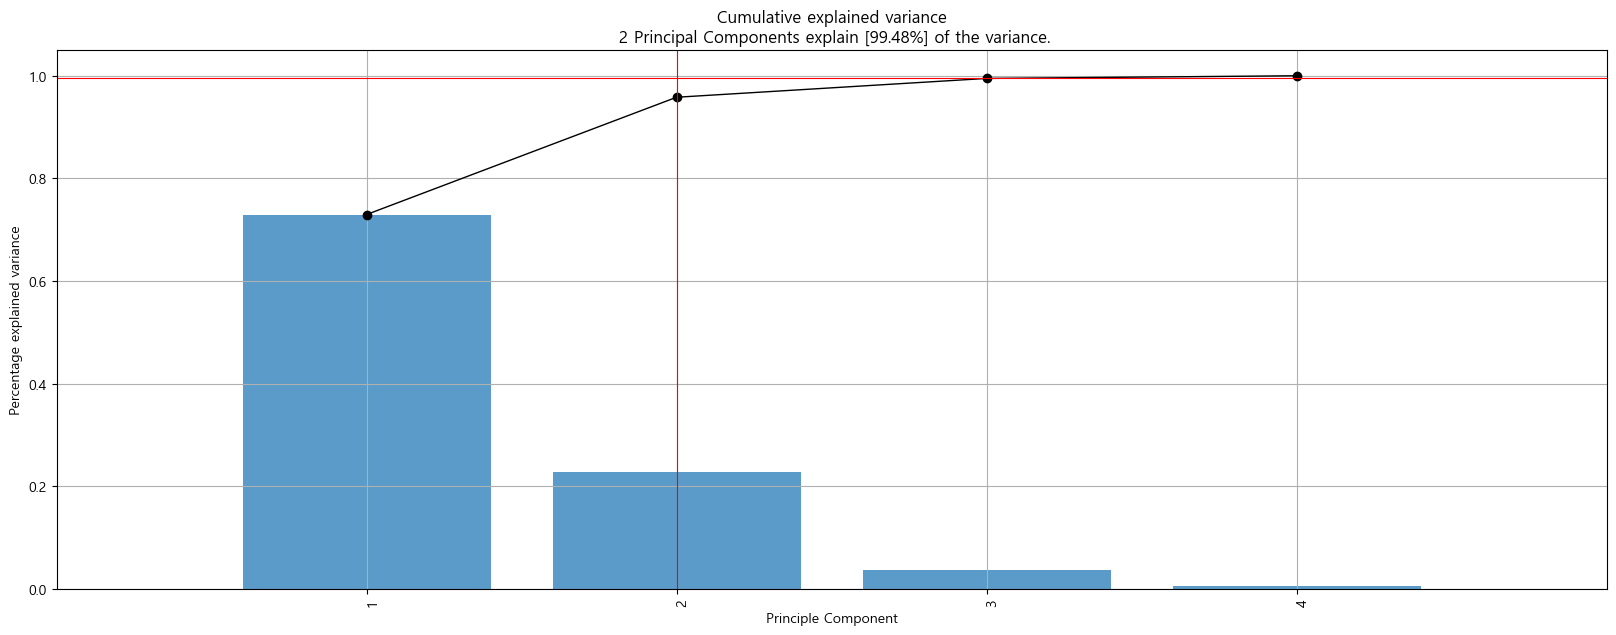

In [8]:
fig, ax = model.plot()
fig.set_size_inches(20, 7)
fig.set_dpi(100)
plt.show()
plt.close()

### [6] biplot

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


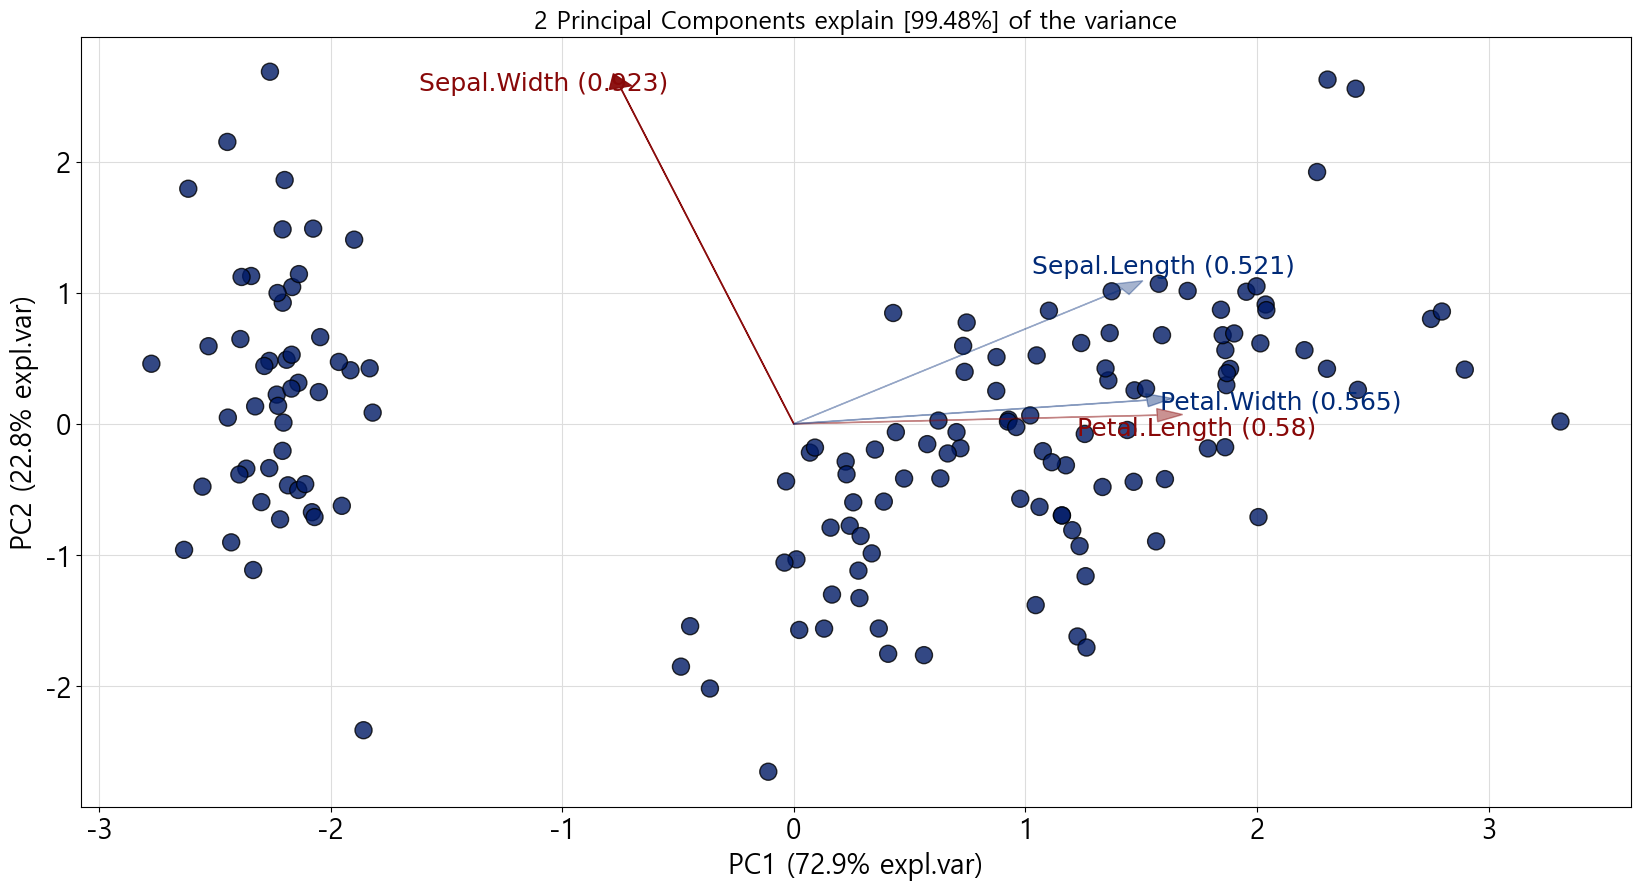

In [9]:
fig, ax = model.biplot()
fig.set_size_inches(20, 10)
fig.set_dpi(100)
plt.show()
plt.close()

## #04. 주성분 분석 결과 활용

+------------+---------+
| target     |   label |
|------------+---------|
| setosa     |       0 |
| versicolor |       1 |
| virginica  |       2 |
+------------+---------+
LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+---------

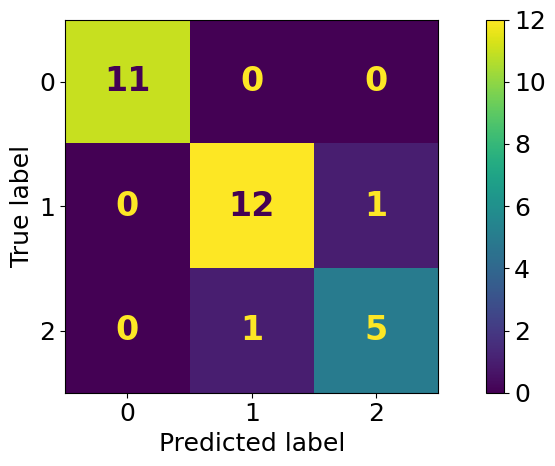


[Roc Curve]


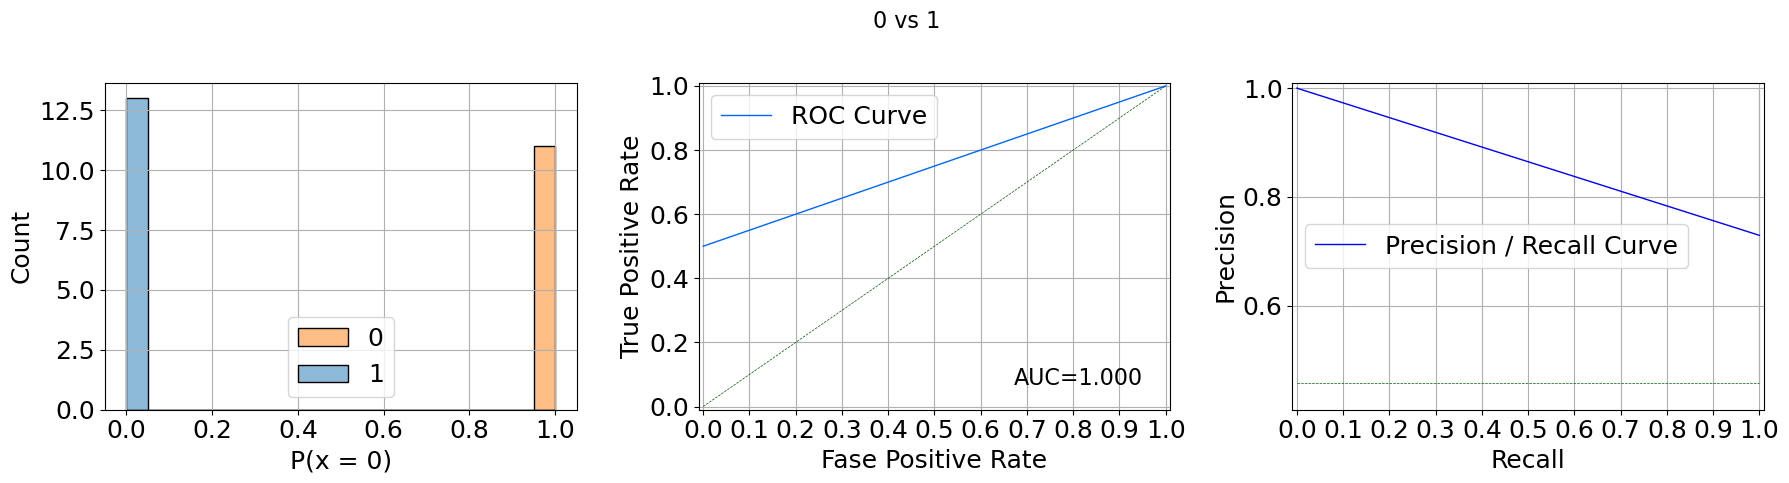

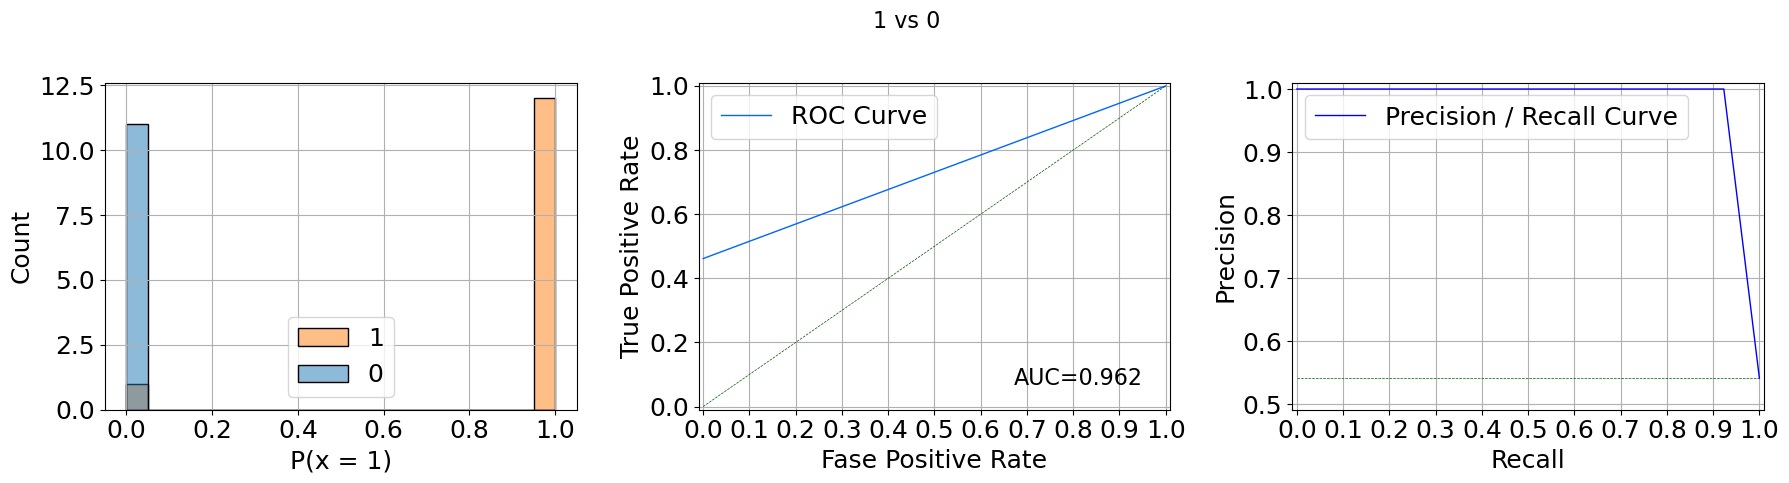

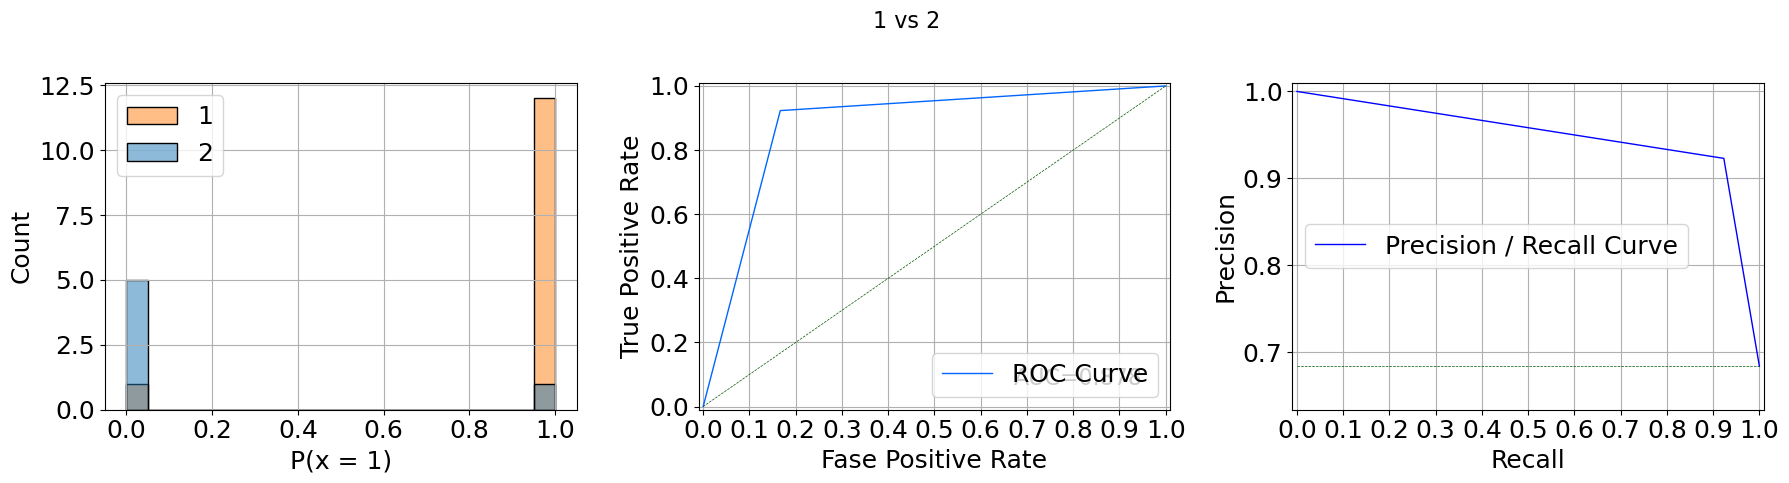

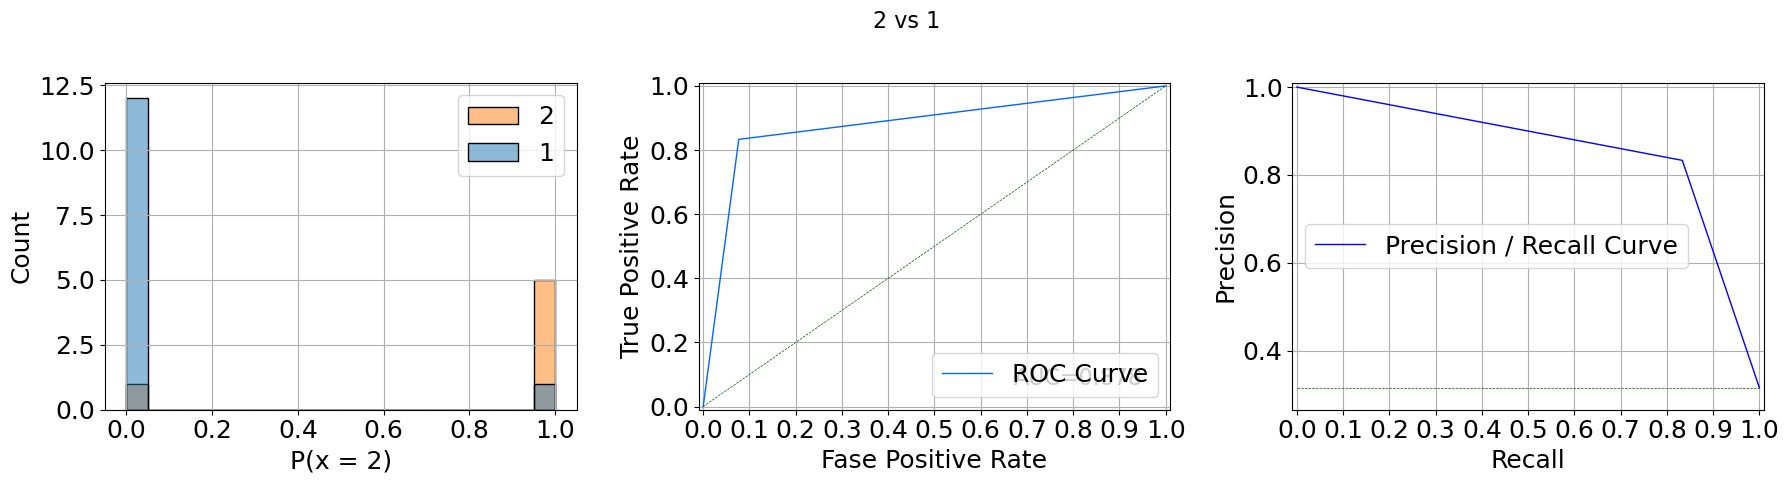

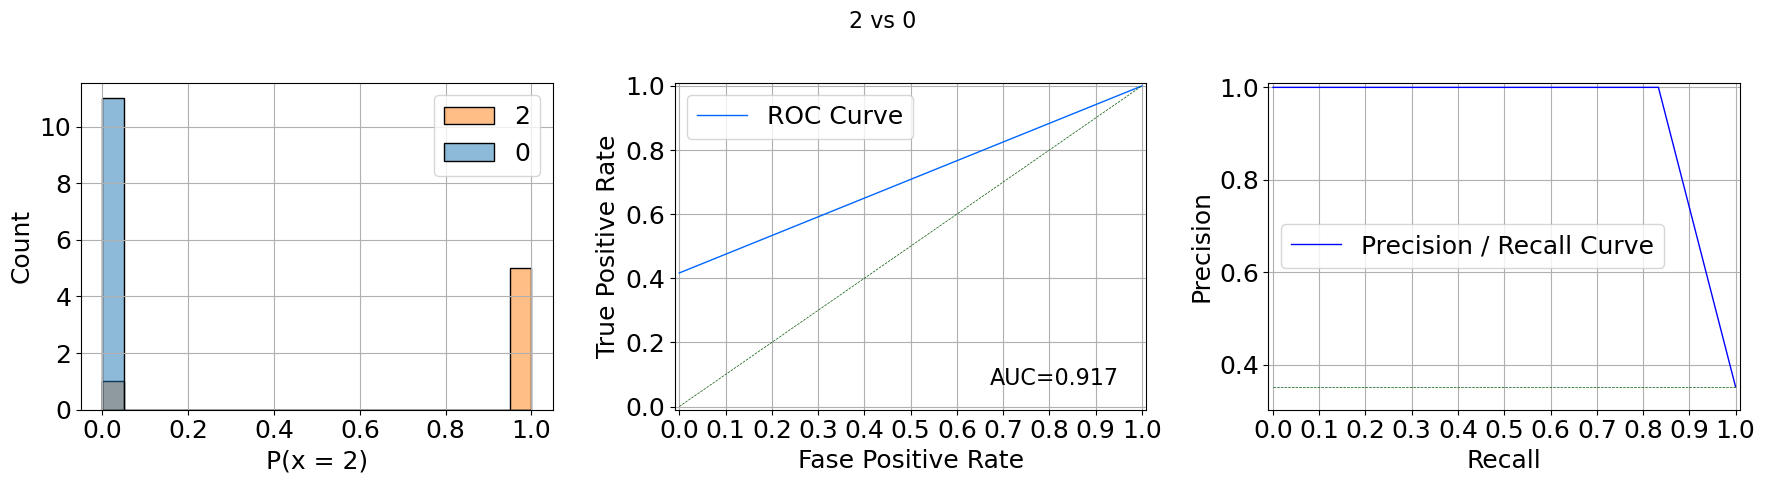

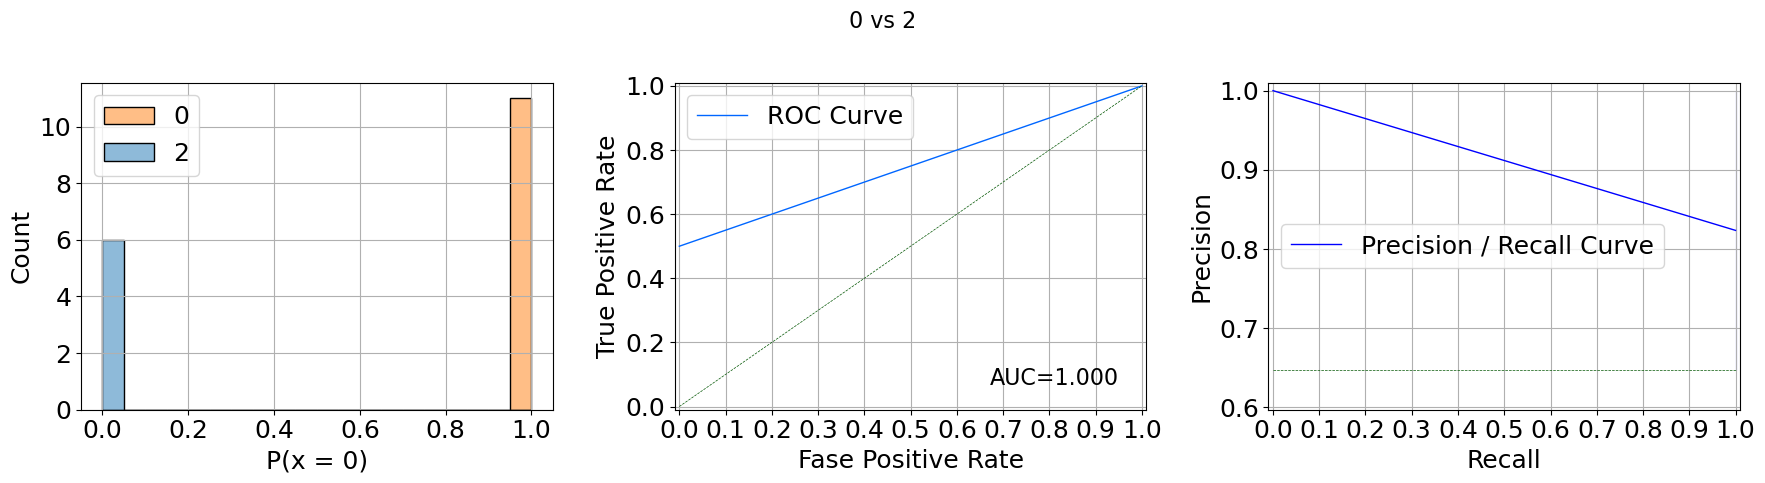

mean roc auc ovo: 0.9391


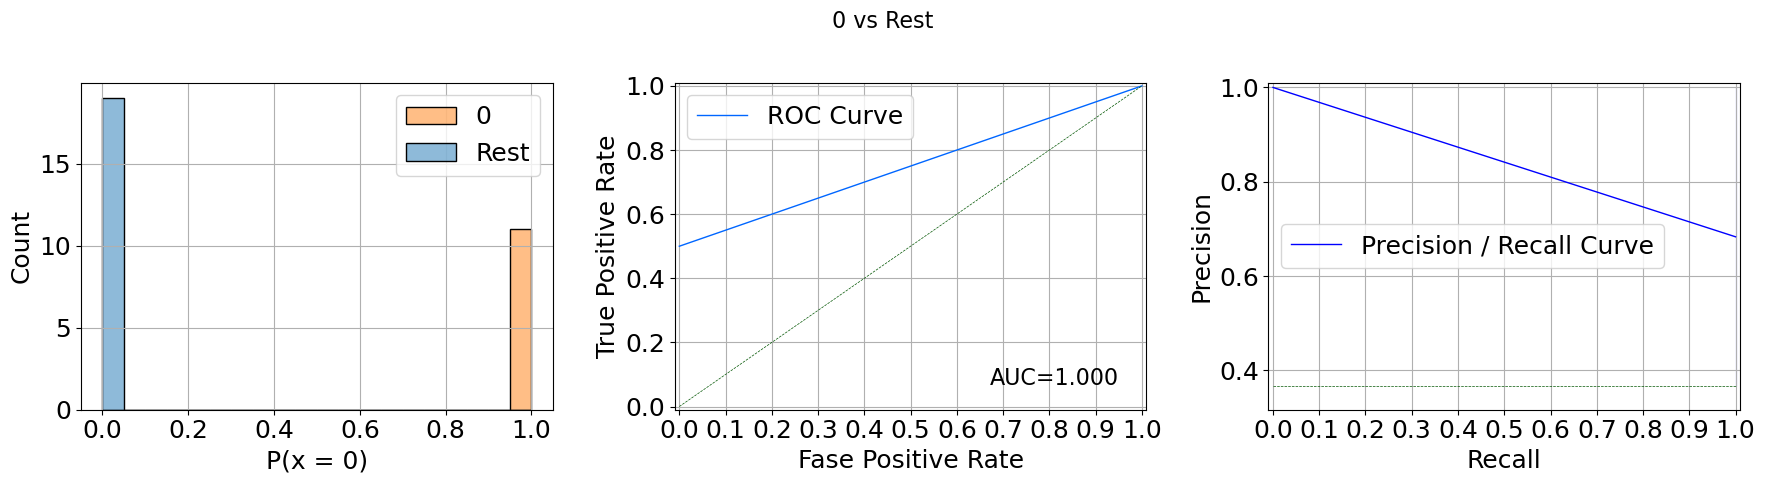

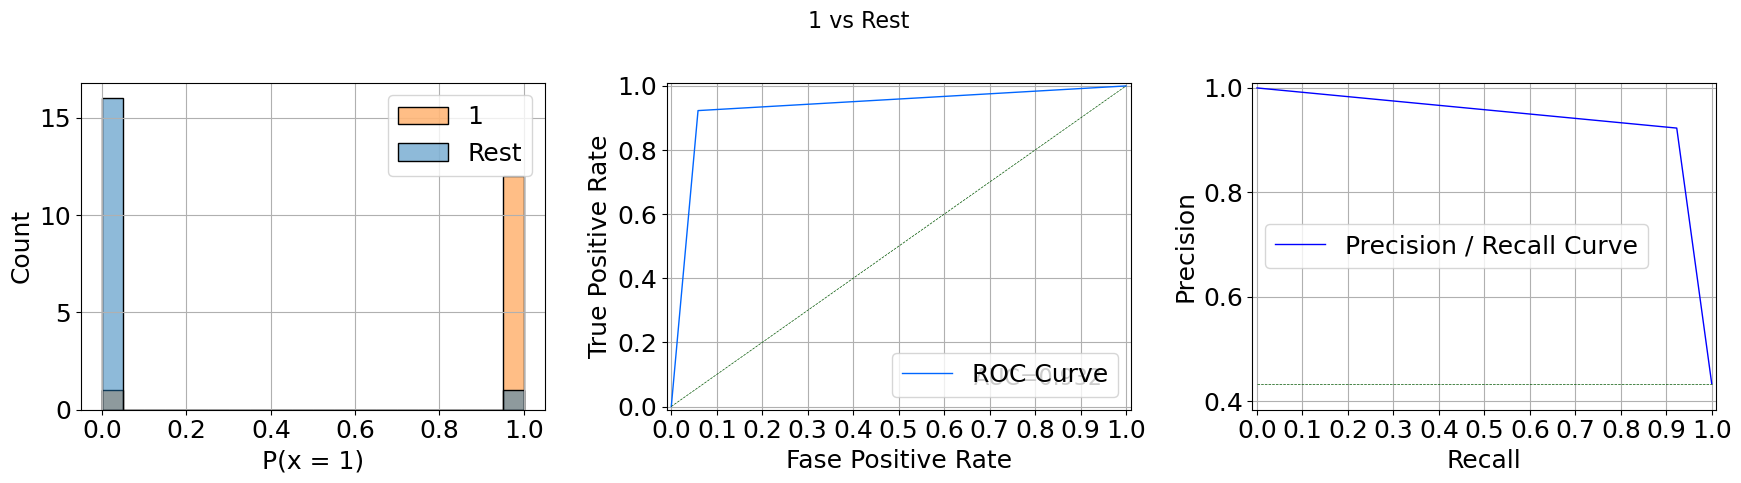

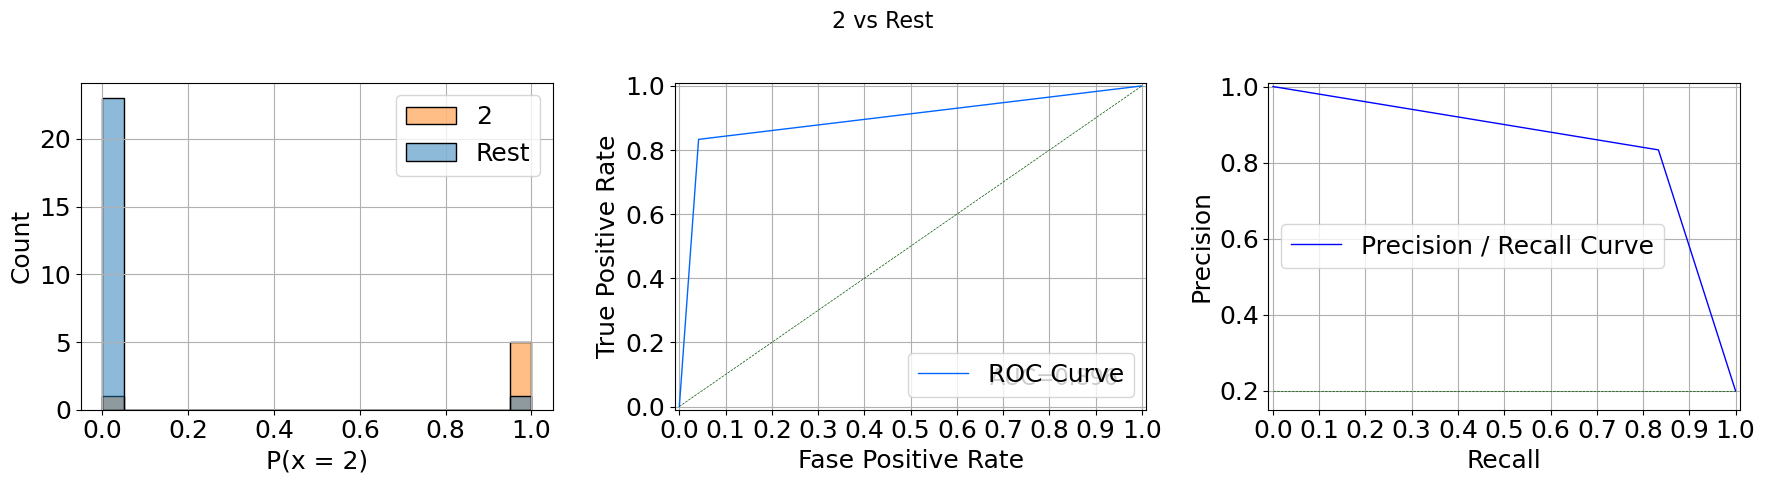

mean roc auc ovo: 0.9427

[학습곡선]


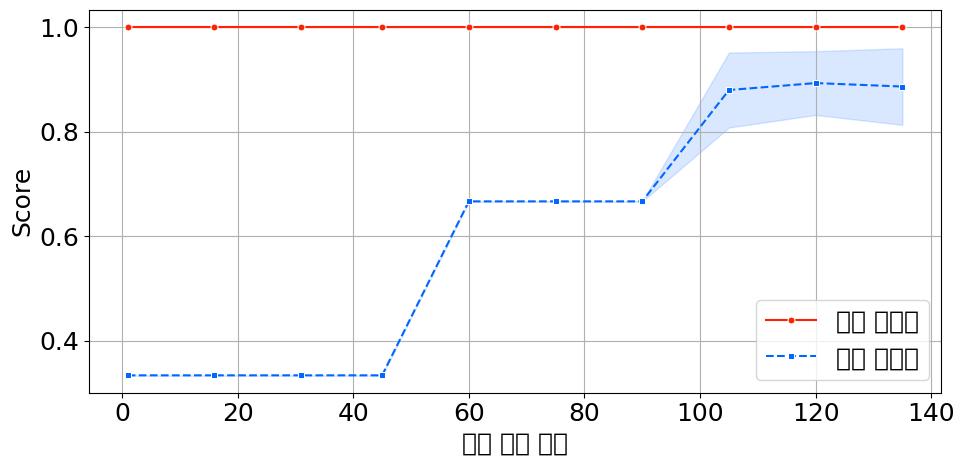

depth: 8 leaves: 13


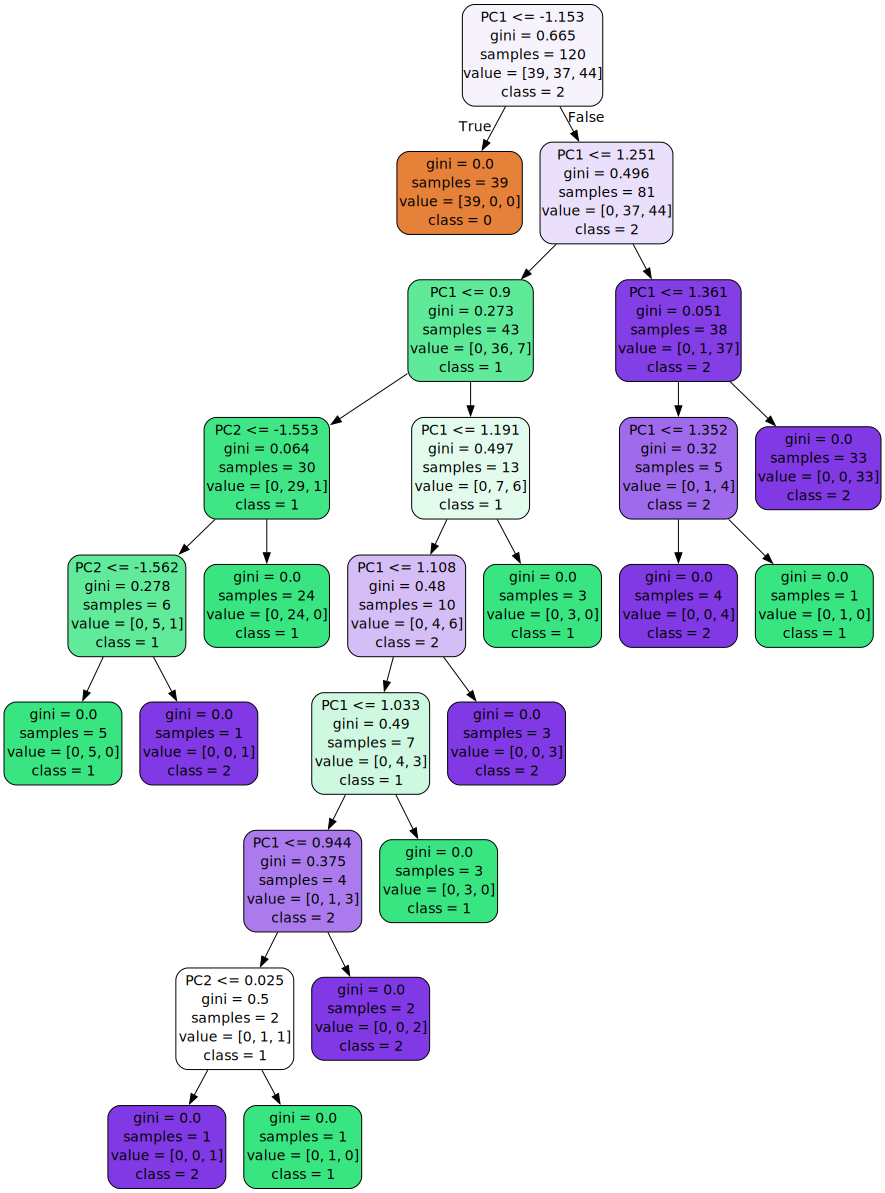

+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       0 | PC1        | 1.09906 |
|  1 | target     |       0 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+
+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       1 | PC1        | 1.09906 |
|  1 | target     |       1 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+
+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       2 | PC1        | 1.09906 |
|  1 | target     |       2 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+


{'SVC': SVC(random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=-1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean', n_jobs=-1, weights='distance'),
 'SGDClassifier': SGDClassifier(alpha=0.01, early_stopping=True, eta0=0.01, loss='modified_huber',
               max_iter=4000, n_jobs=-1, penalty='elasticnet',
               random_state=1234),
 'best': DecisionTreeClassifier(random_state=1234)}

In [10]:
target_df = result['PC'].copy()
target_df['target'] = origin['Species']
target_df = my_labelling(target_df, 'target')

x_train, x_test, y_train, y_test = my_train_test_split(target_df, yname='target')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

my_classification(x_train, y_train, x_test, y_test)

## #05. 주성분 분석 결과 해석

### [1] Explained Variance

> 설명 가능한 분산 비율 (고윳값)

다변량 통계에서 주성분 분석(PCA)의 결과를 설명하는 측정 지표

각 주성분이 데이터의 분산을 얼마나 설명하는지를 나타내며, 데이터 내에서 이러한 주성분의 상대적 중요도를 비교하는데 사용함

In [39]:
result['explained_var']

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

### [2] Explained Variance Ratio

> 기여율

분산비율에 대한 백분률

In [40]:
result['variance_ratio']

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### [3] 분산비율과 기여율 정리

In [41]:
result_df = DataFrame({
    "explained_var": result['explained_var'],
    "variance_ratio": result['variance_ratio']
}, index=[f"pca{num}" for num in range(1, len(result['explained_var'])+1)] )

result_df

,explained_var,variance_ratio
pca1,0.729624,0.729624
pca2,0.958132,0.228508
pca3,0.994821,0.036689
pca4,1.000000,0.005179


### [4] 분산 비율에 대한 시각화

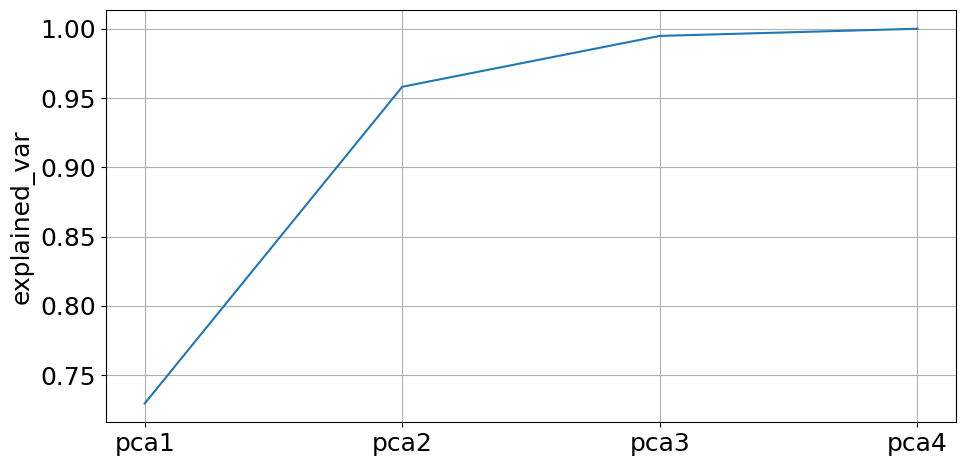

In [42]:
my_lineplot(result_df, xname=result_df.index, yname='explained_var')